# Equation Solving

In [1]:
## Importing Modules

from scipy import linalg as la
from scipy import optimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Linear Equation Systems

> ### Square Systems and LU Factorization

### SymPy

In [2]:
A = sp.Matrix([[2, 3], [4, 6]])
b = sp.Matrix([[4, 0], [0, 3]])

In [3]:
A.rank()

1

In [4]:
b.rank()

2

In [5]:
A.condition_number()

zoo

In [6]:
b.condition_number()

4/3

In [7]:
sp.N(_)

1.33333333333333

In [8]:
A.norm()

sqrt(65)

In [9]:
sp.N(A.norm())

8.06225774829855

### SciPy

In [10]:
c = np.array([[2, 3], [4, 6]]) 
d = np.array([[4, 0], [0, 3]])

In [11]:
np.linalg.matrix_rank(c)

1

In [12]:
np.linalg.cond(c)

1.0045358665050384e+16

In [13]:
np.linalg.norm(c)

8.06225774829855

In [14]:
A = sp.Matrix([[2, 3], [4, 6]])
b = sp.Matrix([[4, 0], [0, 3]])

In [15]:
L, U, perm = A.LUdecomposition()

In [16]:
L

Matrix([
[1, 0],
[2, 1]])

In [17]:
U

Matrix([
[2, 3],
[0, 0]])

In [18]:
perm

[]

In [19]:
L*U

Matrix([
[2, 3],
[4, 6]])

In [20]:
x = A.LUsolve(b) ## This error is expected since A is not full rank! 

NonInvertibleMatrixError: Matrix det == 0; not invertible.

In [21]:
new_A = sp.Matrix([[2, 0], [4, 6]])
b = sp.Matrix([[4, 0], [0, 3]])

In [22]:
L, U, perm = new_A.LUdecomposition() ## Uses upper (U) and lower (L) triangle matrices. 
x = new_A.LUsolve(b)

In [23]:
x

Matrix([
[   2,   0],
[-4/3, 1/2]])

In [24]:
x = new_A.solve(b)

In [25]:
x

Matrix([
[   2,   0],
[-4/3, 1/2]])

In [26]:
#A = PLU -- Where P is the periodation matrix. 

In [27]:
A = np.array([[2, 0], [4, 6]])
b = np.array([[4, 0], [0, 3]])

In [28]:
P, L, U = la.lu(A)

In [29]:
P

array([[0., 1.],
       [1., 0.]])

In [30]:
L

array([[1. , 0. ],
       [0.5, 1. ]])

In [31]:
U

array([[ 4.,  6.],
       [ 0., -3.]])

In [32]:
P.dot(L.dot(U))

array([[2., 0.],
       [4., 6.]])

In [33]:
la.solve(A, b)

array([[ 2.        ,  0.        ],
       [-1.33333333,  0.5       ]])

### Graphing numerical vs parametric condition number

In [34]:
## We want to draw an ill-conditioned matrix at p = 1 and see how the difference between parametric and numerical solving
## manifest itself. 

In [35]:
p = sp.symbols("p", positive=True)

In [36]:
A = sp.Matrix([[p, sp.sqrt(p)], [sp.exp(p-1), 1/sp.sqrt(p)]]) #ill-conditioned at p = 1

In [37]:
b = sp.Matrix([1, 2])

In [38]:
x = A.solve(b)

In [39]:
x

Matrix([
[                      (2*p - 1)/(p*exp(p - 1) - p)],
[(-2*p + exp(p - 1))/(sqrt(p)*exp(p - 1) - sqrt(p))]])

Text(0.5, 0, '$p$')

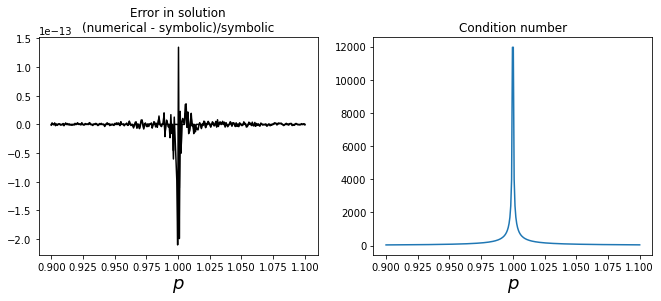

In [40]:
#symbolic problem
p = sp.symbols("p", positive=True)
A = sp.Matrix([[1, sp.sqrt(p)], [1, 1/sp.sqrt(p)]])
b = sp.Matrix([1, 2])

#solve_symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

#Numerical
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

#graph the result
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

p_vec = np.linspace(0.9, 1.1, 300)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
    
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r"$p$", fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r"$p$", fontsize=18)